In [1]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('gradient-descent')
jovian.set_colab_id('1ipUh4WfFbfjNKxha5tOTJzJOxWavjyCG')

     |████████████████████████████████| 71kB 3.2MB/s 


In [2]:
!pip install jovian --upgrade --quiet

Gradient Descent is one of the most important algorithms in all Machine Learning and all Deep Learning. it is an extremely powerful optimization algorithm that can be used to train linear regression models, logistic regression models or even neural networks. If you are embarking on machine learning, it is therefore imperative that you fully understand the gradient descent algorithm.

# What is Gradient Descent?
Gradient Descent is an optimization algorithm that finds the minimum of any convex function by gradually converging to it.  

**Note**: *A convex function is a function whose appearance resembles that of a beautiful valley with a global minimum in the center. Conversely, a non-convex function is a function which has several local minima and the gradient descent algorithm should not be used on these functions, at the risk of blocking at the first minima encountered*.

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


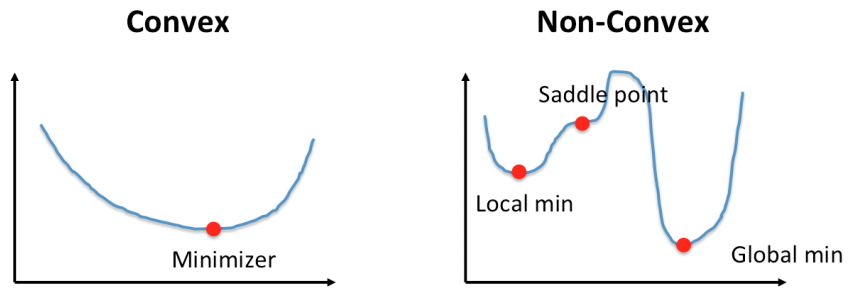

In [6]:
from IPython.display import Image

Image("/content/drive/MyDrive/convex_non-convex.png")

# Why is Gradient Descent so important in Machine Learning?

In Machine Learning, we will use the Gradient Descent algorithm in **supervised learning** problems to minimize the **cost function (loss)**, which is precisely a **convex** function (for example the root mean square error).  

It is thanks to this algorithm that the machine **learns**, that is, finds the **best model**. Indeed, remember that minimizing the cost function(loss) amounts to finding the parameters **a, b, c**, etc. which give the smallest errors between our model and the **y** points of the Dataset. Once the cost function(loss) is minimized, it's the Jackpot! Speech recognition programs, computer vision programs, and stock market prediction applications are ours!  

So you understand why the Gradient Descent algorithm is fundamental: **The machine learns from it**.

To explain how it works, I'll start by giving you an analogy that anyone can understand, after which I'll get into the maths.

# Lost in the mountains, how can you find your way back?

Imagine being lost in the middle of the mountain. Your goal is to reach a refuge located at the lowest point of the valley in which you are located. The problem is, you didn't take a map with you, so you are completely unaware of the coordinates of this refuge. You have to fend for yourself ...  
Don't worry, here is a 2-step strategy that will get you out of it!  
 1. From your current position, you look all around you for the direction of where the slope goes down **the strongest**.
 2. Once you have found this direction, you follow it for **a certain distance** (say you walk 300 meters) then you repeat the operation of step 

By repeating steps 1 and 2 in this way, you are sure to converge towards the minimum of the valley. Well this strategy is neither more nor less than the Gradient Descent algorithm!

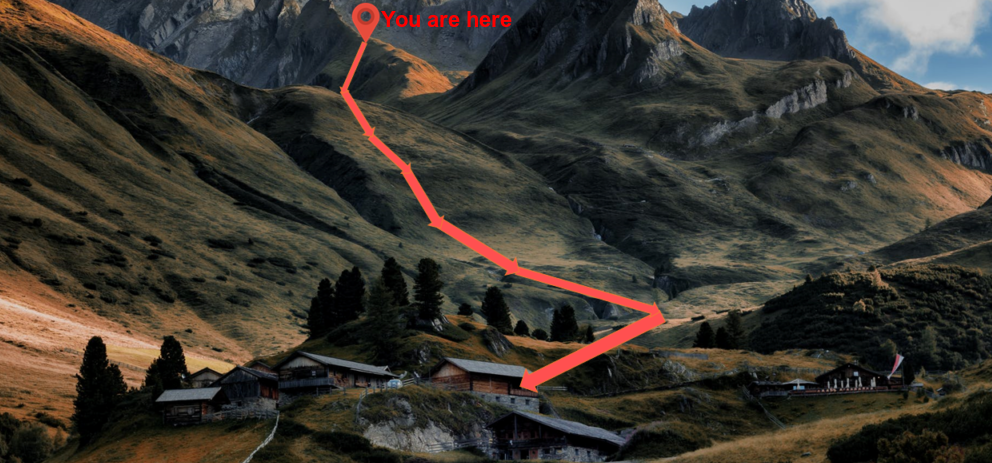

In [7]:
Image('/content/drive/MyDrive/mountain.png')

# Gradient Descent: From the Mountain to Machine Learning
In machine learning, the valley in which we are located is in fact the **Cost Function J**. We can repeat the two steps seen previously in a loop to find the minimum!

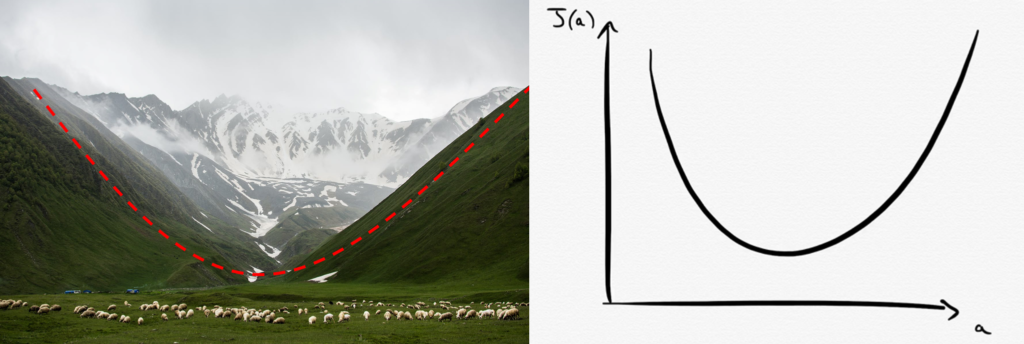

In [9]:
Image('/content/drive/MyDrive/analogy.png')

# Step 1: Calculate the derivative of the Cost Function
We start from a random starting point (as if we were lost in the mountains) and then we measure the value of the slope at this point. And how do you measure a slope in mathematics? By calculating the derivative of the function!  

*Note: Gradient and derivative can be thought of as the same thing. In fact the gradient is the vector generalization of the derivative. But really, it's the same.*

# Step 2: Update the model parameters

You then progress a certain distance $\alpha$ in the direction of the downhill slope, but not 300 meters this time! This distance is called **Learning Rate**, which reflects the speed of learning.  

This operation results in modifying the value of the parameters of our model (our coordinates in the valley change when we move).

# Gradient Descent: An Iterative Algorithm

By repeating these two steps in a loop, the Gradient Descent algorithm is therefore an iterative algorithm. To illustrate it on a graph, I will take the example of the cost function **J(a, b)** that we developed for a linear regression. The algorithm finds the ideal value for the parameters **a** and **b**.

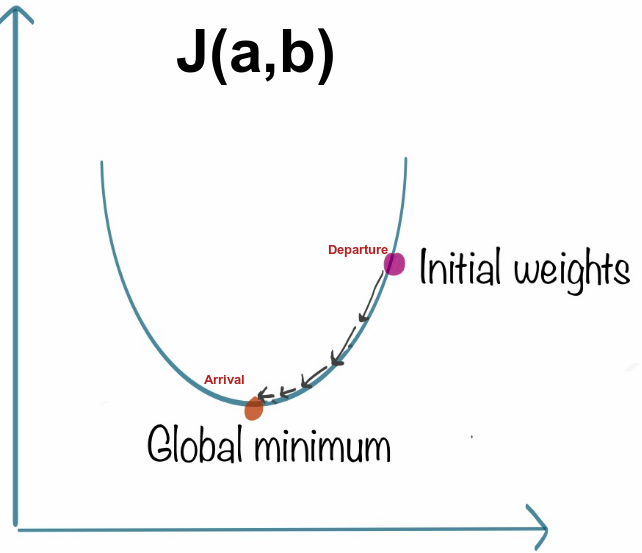

In [10]:
Image('/content/drive/MyDrive/gd.png')

In summary, here are the links between the mountain analogy and Machine Learning:

| Mountain analogy| Machine learning|
|-----------------|-----------------|
| Convex valley|Cost function(loss) |
| Valley slope| Derived from the Cost Function|
| Distance traveled (300 meters)| Learning Rate multiplied by the derivative|
| Initial coordinates (we are lost)| Initial parameters (chosen at random)|
| Coordinates of the refuge| The parameters that give the best model|

# How to implement the Gradient Descent algorithm?

To implement this algorithm, it's very simple! just write the following line and the parameter **a** will converge to the minimum of **J (a, b)**. We will do the same for the parameter **b**!

## $$a = a - \alpha\frac{\partial J(a,b)}{\partial a}$$  

In fact, there is nothing magic about it. I will explain to you how a single line allows us to obtain the gradient descent observed in the previous graph.  

When the algorithm starts on the turn $i = 0$, we can calculate the position $a_1$ by applying the formula:
$$a_1 = a_0 - \alpha\frac{\partial J(a,b)}{\partial a}$$   

In the case where $ a_0 $ is located to the left of our minimum, the derivative $\frac {\partial J(a, b)} {\partial a} $ will be negative (because you can see that you are on a downward slope . $ \alpha $ being always positive, the product $ \alpha \times \frac {\partial J(a, b)} {\partial a} $ is negative, so we have $ a_1 = a_0 - foo_{negative} $ which amounts to $a_1 = a_0 + foo_{positive}$. Thus we have $ a_1> a_0 $, which results in moving to the right.  

Conversely, if $a_0$ is on the other side of the valley, then the derivative will be positive this time, and by deduction you will find that $a_1 < a_0$, which results in a moving towards the left of the graph.

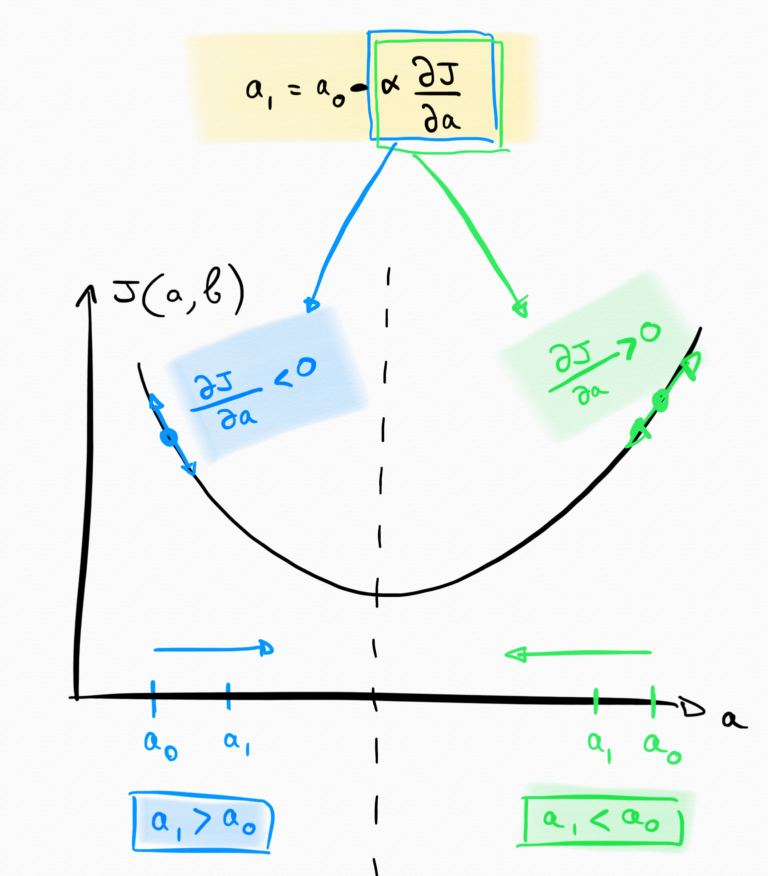

In [11]:
Image('/content/drive/MyDrive/slope.png')

Now that you know the gradient descent formula, all you have to do is use it to minimize the cost functions of your choice. The calculation of the partial derivatives $ \frac {\partial J(a, b)}{\partial a} $ and $\frac {\partial J a, b)}{\partial b}$ will therefore depend on the problems on which you work.  

In this last part, I therefore propose to see how to calculate the partial derivatives of the root mean square error, which will allow you to use gradient descent to solve linear regression problems.

# Application: Gradient Descent for Linear Regression

To apply the gradient descent to a linear regression problem, you have to **calculate the gradient** of the root mean square error(MSE):  
### $$J(a, b) = \frac{1}{2m} \sum_{i = 1}^{m}(ax^{(i)} + b - y^{(i)})^2$$  

To keep it simple, I will detail the calculation of the partial derivatives of this function in 3 steps.


# 1. Express the cost function as a compound function
To carry out this calculation, we must start by decomposing this function into 2 functions $ g $ and $ f $:
### $$f(a, b) = ax + b - y$$
### $$g(f) = f^2$$

We then have:  
### $$J(a, b) = \frac{1}{2m} \sum g \circ f(a, b)$$

To calculate the gradient in $ a $, we can write that:
### $$\frac{\partial J(a, b)}{ \partial a} = \frac{1}{2m} \sum \frac {\partial g \circ f(a, b)}{\partial a}$$



# 2. Derivative of the compound function
The next step is to calculate the derivative $\sum \frac {\partial g \circ f(a, b)}{\partial a}$.  
As a reminder, here is the formula to derive a compound function $(g \circ f(x))' = f'(x) \times g' (f(x))$  
By deriving this function, we thus obtain:
### $$\frac{\partial J(a, b)}{\partial a} = \frac{1}{m} \sum_{i = 1}^{m} x^{(i)} \times (ax^{(i)} + b - y^{(i)})$$

*Note: (the square of the function g has fallen, and is simplified with the $ \frac{1}{2m} $ and the coefficient $ x ^{(i)}$ coming from $ f(a, b)$ came out.*

# 3. The partial derivative with respect to b
For the calculation of the gradient according to the parameter b, we have the same result at the factor $ x ^ {(i)} $ ready, which gives:
### $$\frac{\partial J(a, b)}{\partial b} = \frac{1}{m} \sum_{i = 1}^{m} (ax^{(i)} + b - y^{(i)})$$

The good news is that in practice you will never do linear algebra at this level in machine learning. Here, I go into the details so that you can learn machine learning in more detail than those that only scratch the surface.

The 2nd good news, Now that you have the calculations for the two gradients, just enter them into the gradient descent algorithm, and the machine will start to learn!

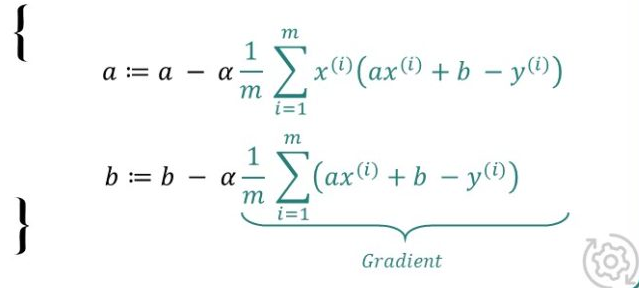

In [13]:
Image('/content/drive/MyDrive/loops.png')

# Learning Rate: the role of the alpha hyper-parameter
Before concluding, I must tell you about the Learning Rate **$ \alpha $**. In Machine Learning, we call this kind of factor a Hyper-parameter, because it is not strictly speaking a parameter of our model, but it still has an impact on the final performance of our model (just like model parameters). I'll explain why.

## Learning Rate too large
If the Learning Rate is too large, then you will be taking too big steps in the gradient descent. This has the advantage of going down quickly to the minimum of the cost function, but you risk missing that minimum by oscillating around endlessly ... Too bad. In the valley analogy, it's like moving several kilometers each time, passing the refuge without realizing it!

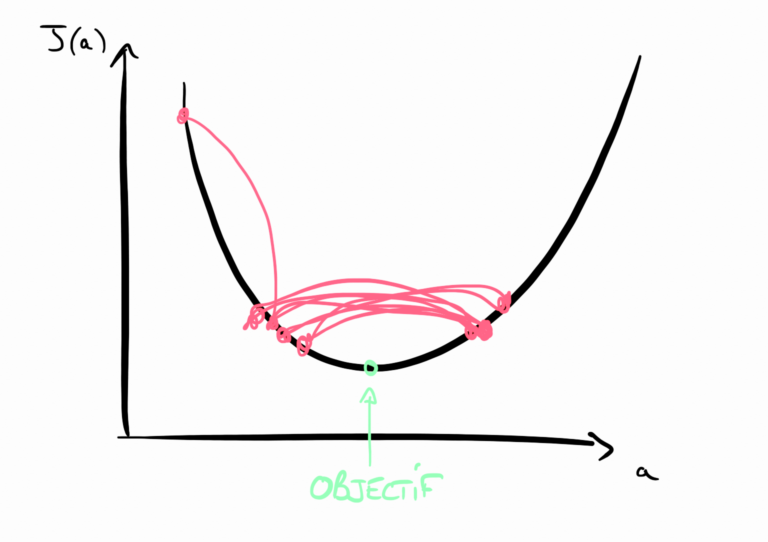

In [14]:
Image('/content/drive/MyDrive/lrbig.png')

## Learning Rate too small
To avoid the previous case, you might be tempted to choose a very low Learning Rate. But if it is too low, then you may take an infinite amount of time before converging to the minimum of the cost function. It's a bit like choosing to walk millimeter by millimeter up the mountain to find the lowest point in the valley. Good luck !

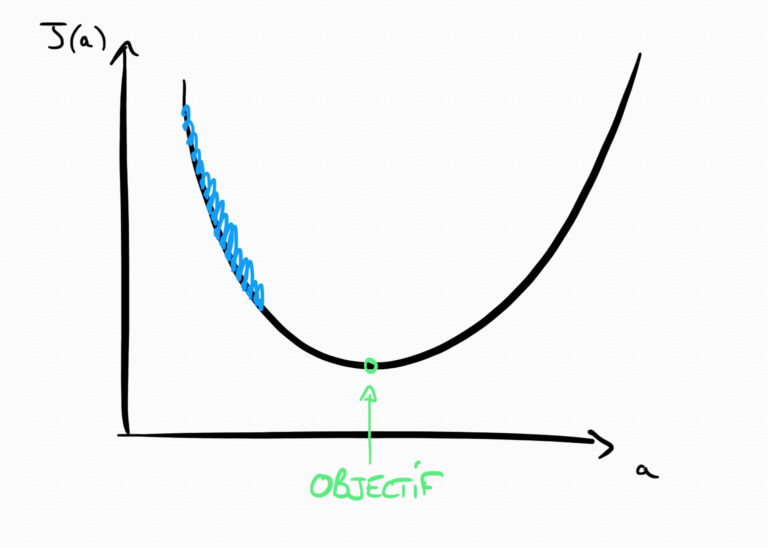

In [15]:
Image('/content/drive/MyDrive/lrsmall.png')

# How to find the right value for your alpha hyper-parameter?
Unfortunately, there is no magic formula to finding the right Learning Rate. More often than not, one has to grope and try several values before finding the right one. However, a good Learning Rate is often around $ \ alpha =  0.001$.

In [16]:
import jovian
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/boubekri/gradient-descent


'https://jovian.ai/boubekri/gradient-descent'